In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Importing the csv from local folder to python
import pandas as pd
a=pd.read_csv('movie_metadata11.csv')
b=pd.read_csv('ratings1.csv')
m= a.merge(b, on='movieId')
m.to_csv("m.csv", index=False)

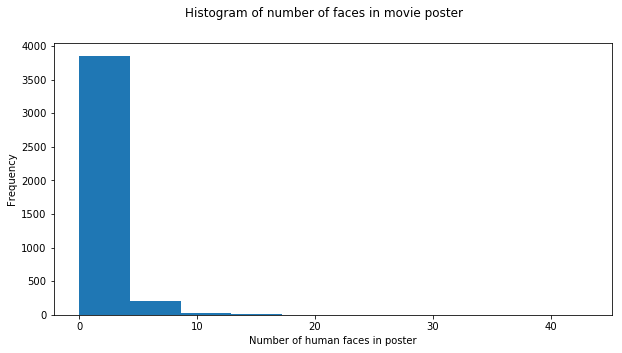

In [5]:
fig=plt.figure(figsize=(10,5))
m['facenumber_in_poster'].plot(kind='hist')
plt.xlabel("Number of human faces in poster")
plt.ylabel("Frequency")
plt.suptitle('Histogram of number of faces in movie poster')
plt.show()

In [6]:
#Overall, nearly 95% of all the 4096 posters have less than 5 faces. Besides,

# --> Great movies tend to have fewer faces in posters
# --> If a poster has one or no human faces, we cannot tell if the movie is great simply from poster
# --> If a poster has more than 5 faces, the likelihood of the movie being great is low

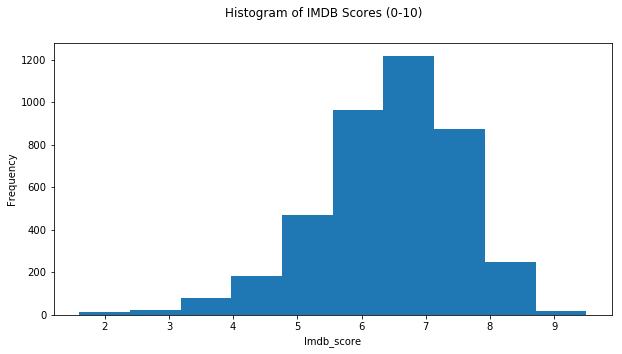

In [7]:
fig=plt.figure(figsize=(10,5))
m['imdb_score'].plot(kind='hist')
plt.xlabel("Imdb_score")
plt.ylabel("Frequency")
plt.suptitle('Histogram of IMDB Scores (0-10)')
plt.show()

In [8]:
#Movies having rating larger than 8.0 are listed in the IMDB top 250, and they are truly great movies from many perspective. 
#Movies with rating from 7.0 to 8.0 are probably still good movies
#Movies with rating from 1 to 5 are sometimes considered as ones that one should avoid 

/home/ubuntu/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


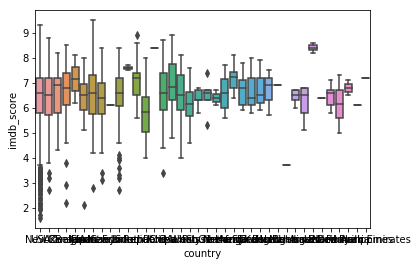

In [9]:
sns.boxplot(y="imdb_score", x="country", data=m)
plt.rcParams['figure.figsize'] = (60,18)

In [10]:
#USA and UK are the two countries that produced the most number of movies in the past century, 
#including a large amount of bad movies. 
#The median IMDB scores for both USA and UK are, however, not the highest among all countries. 
#Some developing countries, such as Libya, Iran, Brazil, and Afghanistan, produced a small amount of movies with 
#high median IMDB scores.

/home/ubuntu/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


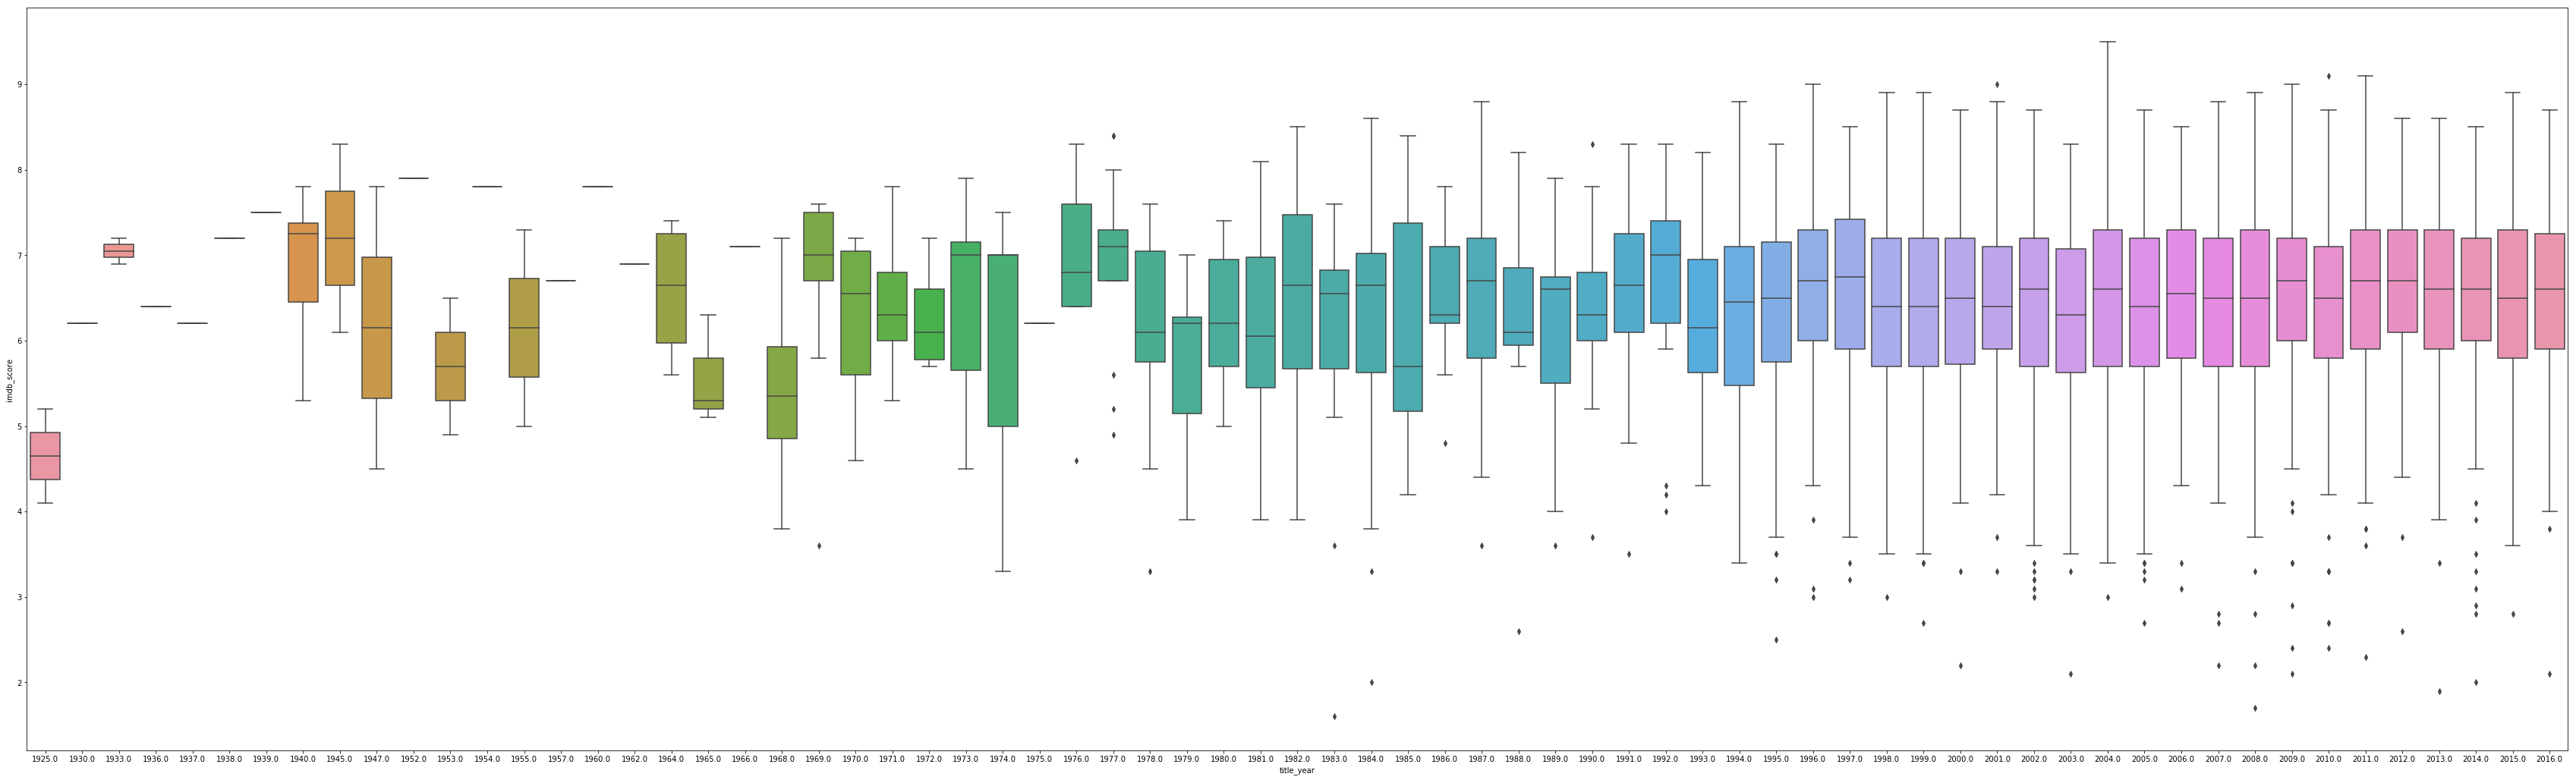

In [11]:
sns.boxplot(y="imdb_score", x="title_year", data=m)
plt.rcParams['figure.figsize'] = (60,18)

In [12]:
#In the last century, it seems that the number of movies produced annually largely increased since 1960. 
#This is understandable since the development of filming industry goes hand in hand with the development of science 
#and technology. But we should be aware that along with the boom of movie industry since 2000, there are many movies with low IMDB score.

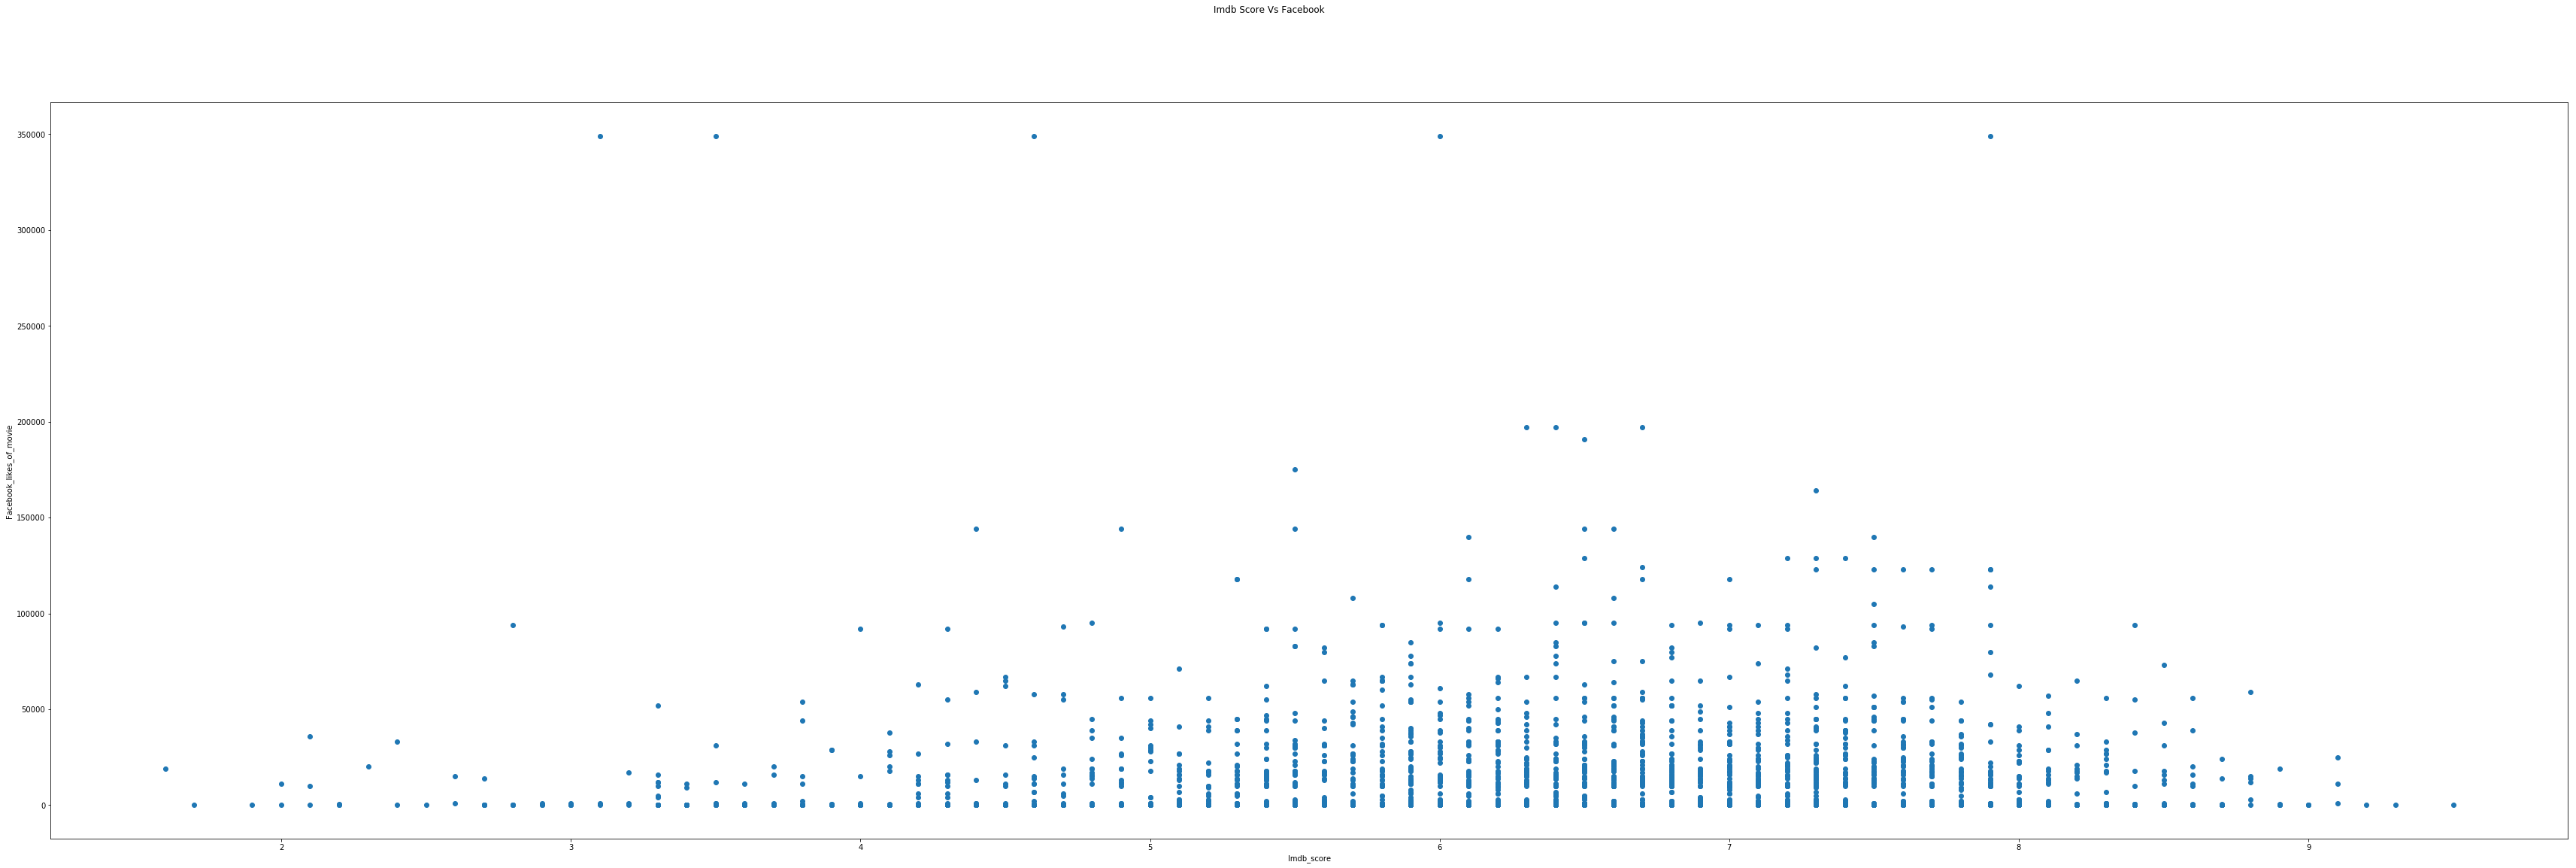

In [13]:
plt.scatter(m.imdb_score,m.movie_facebook_likes)
plt.xlabel("Imdb_score")
plt.ylabel("Facebook_likes_of_movie")
plt.suptitle('Imdb Score Vs Facebook')
plt.rcParams['figure.figsize'] = (60,18)

In [14]:
#It is interesting to know how does the IMDB score correlate with the movie popularity in the social network. 
#From the scatter plot below, we can find that overall, the movies that have very high facebook likes tend to be the ones 
#that have IMDB scores around 8.0

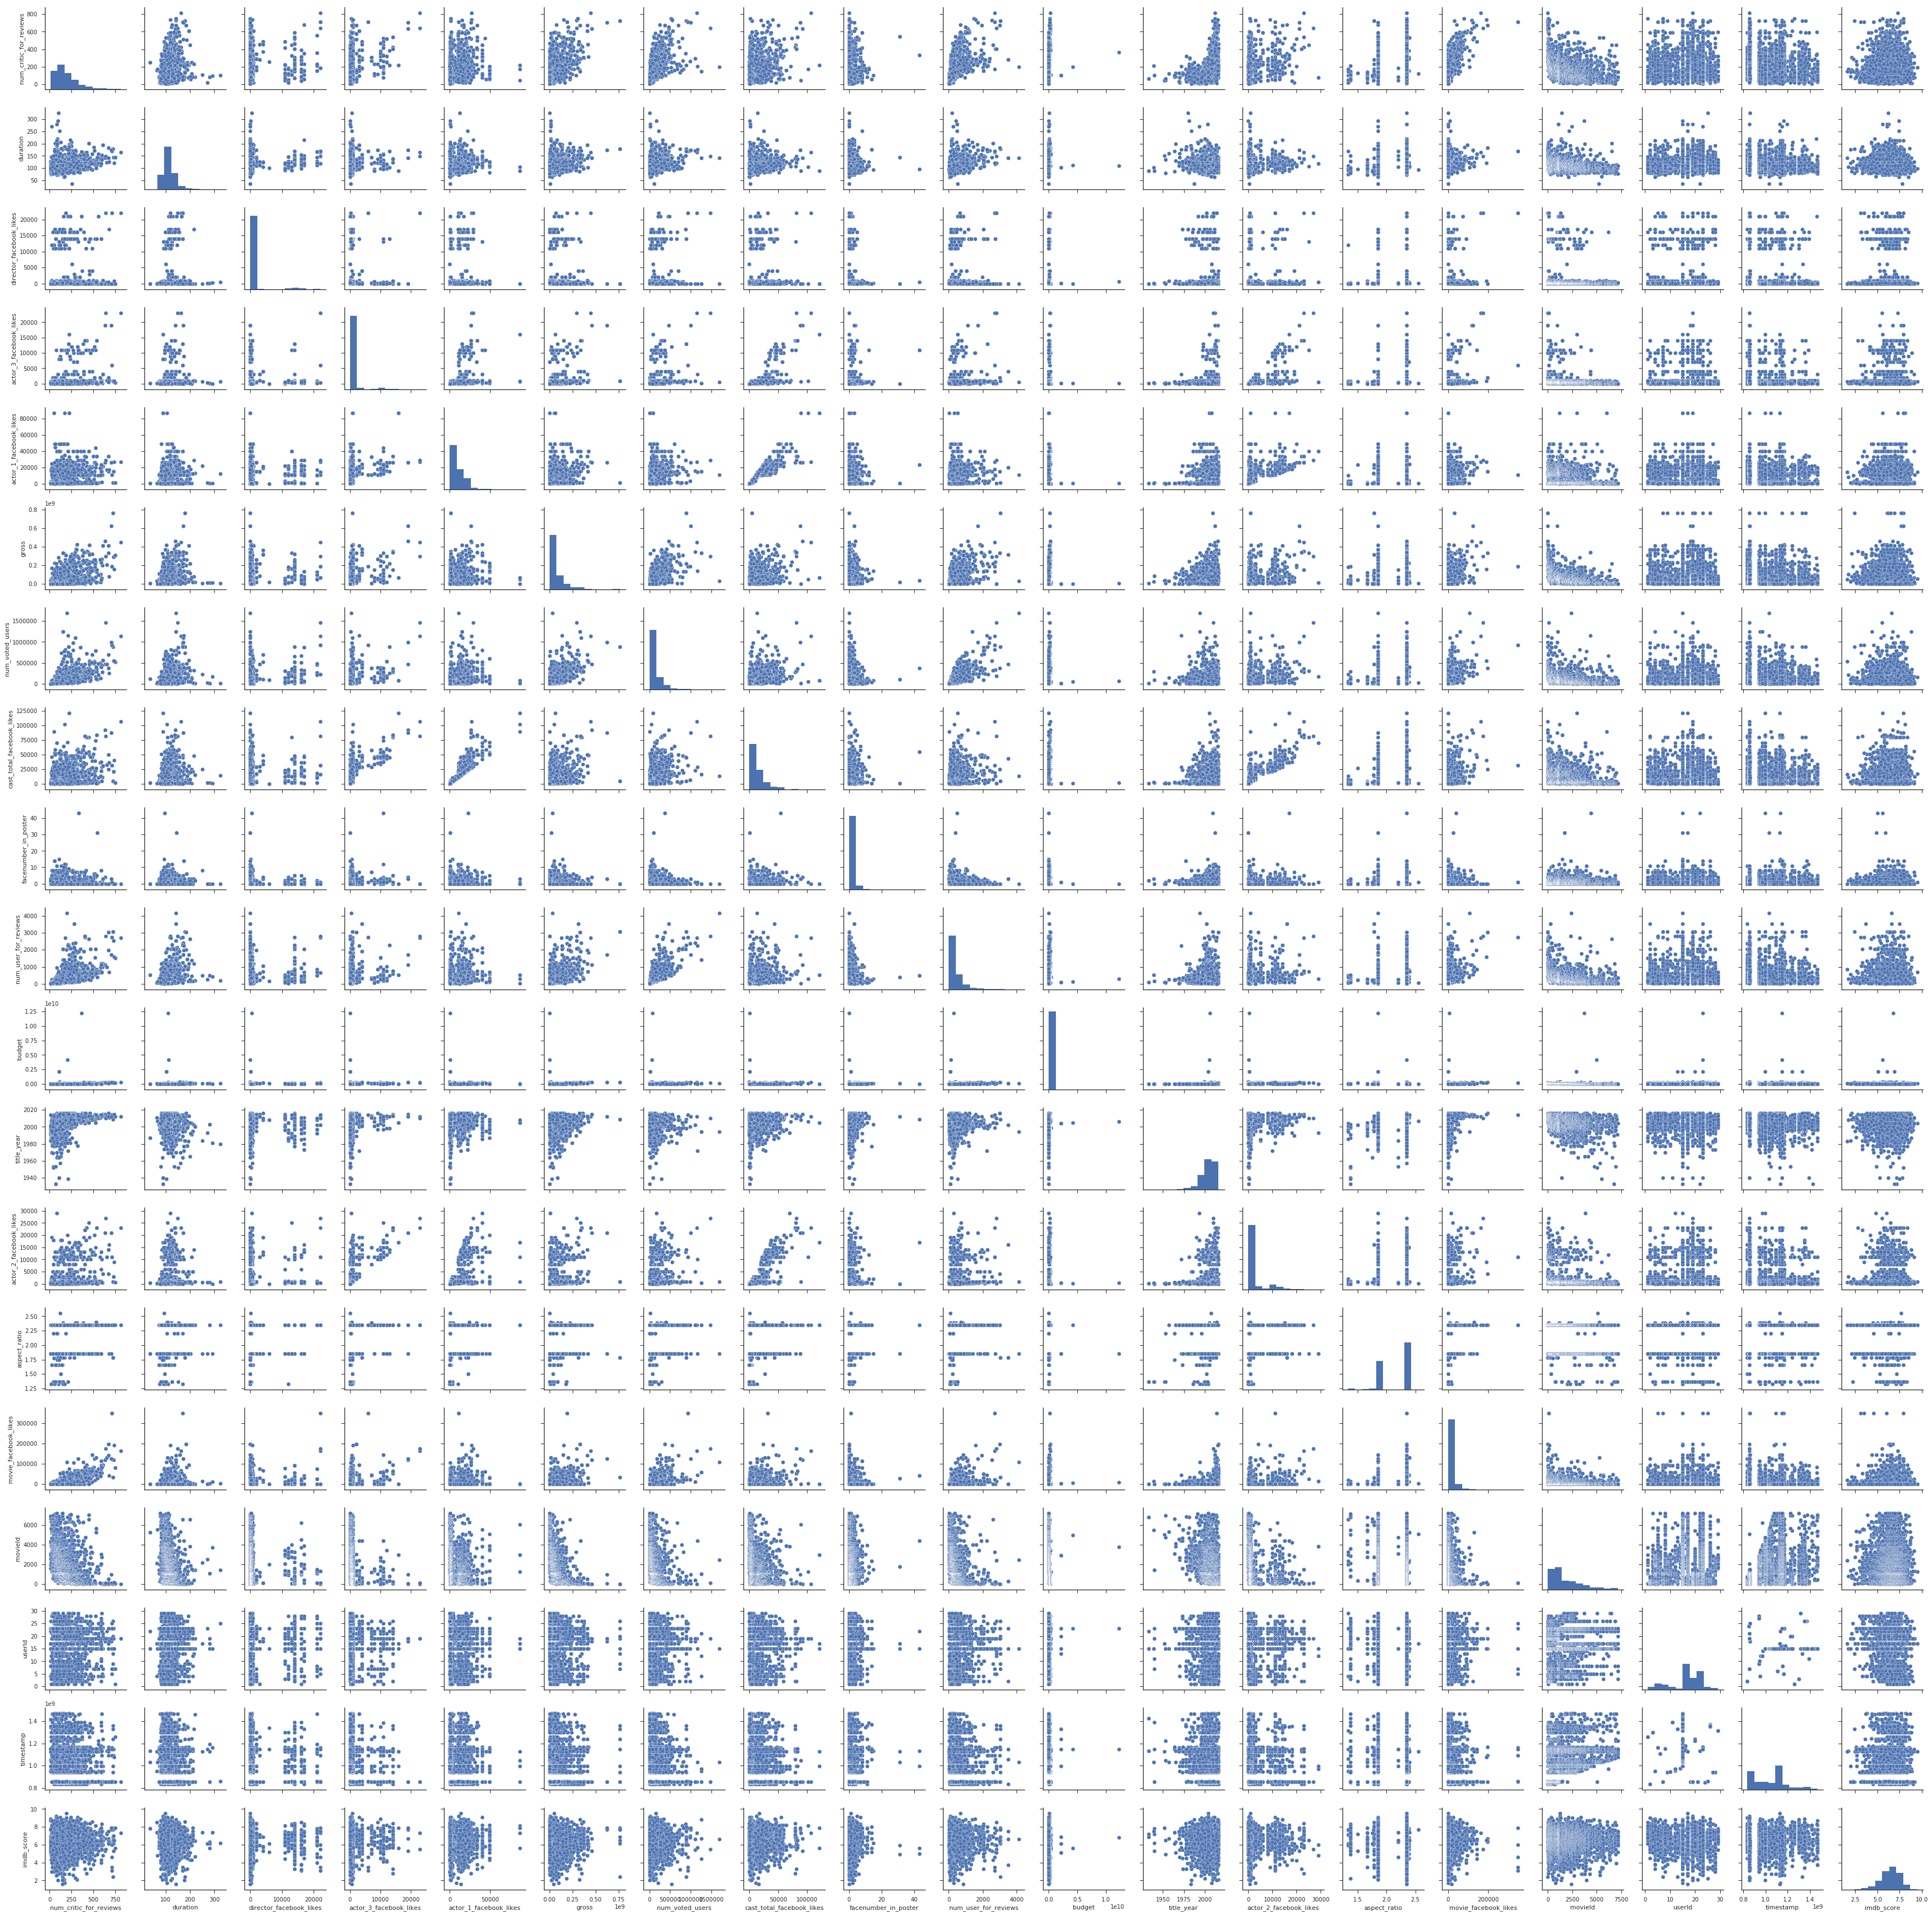

In [41]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(m)

                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.322049   
duration                                 0.322049  1.000000   
director_facebook_likes                  0.179769  0.191374   
actor_3_facebook_likes                   0.309578  0.148949   
actor_1_facebook_likes                   0.310303  0.201048   
gross                                    0.514357  0.271819   
num_voted_users                          0.664475  0.353691   
cast_total_facebook_likes                0.371849  0.224987   
facenumber_in_poster                     0.013264  0.015338   
num_user_for_reviews                     0.628277  0.379684   
budget                                   0.141870  0.066672   
title_year                               0.360682 -0.116839   
actor_2_facebook_likes                   0.323963  0.175600   
aspect_ratio                            -0.052478 -0.149244   
movie_facebook_likes                     0.667798  0.23

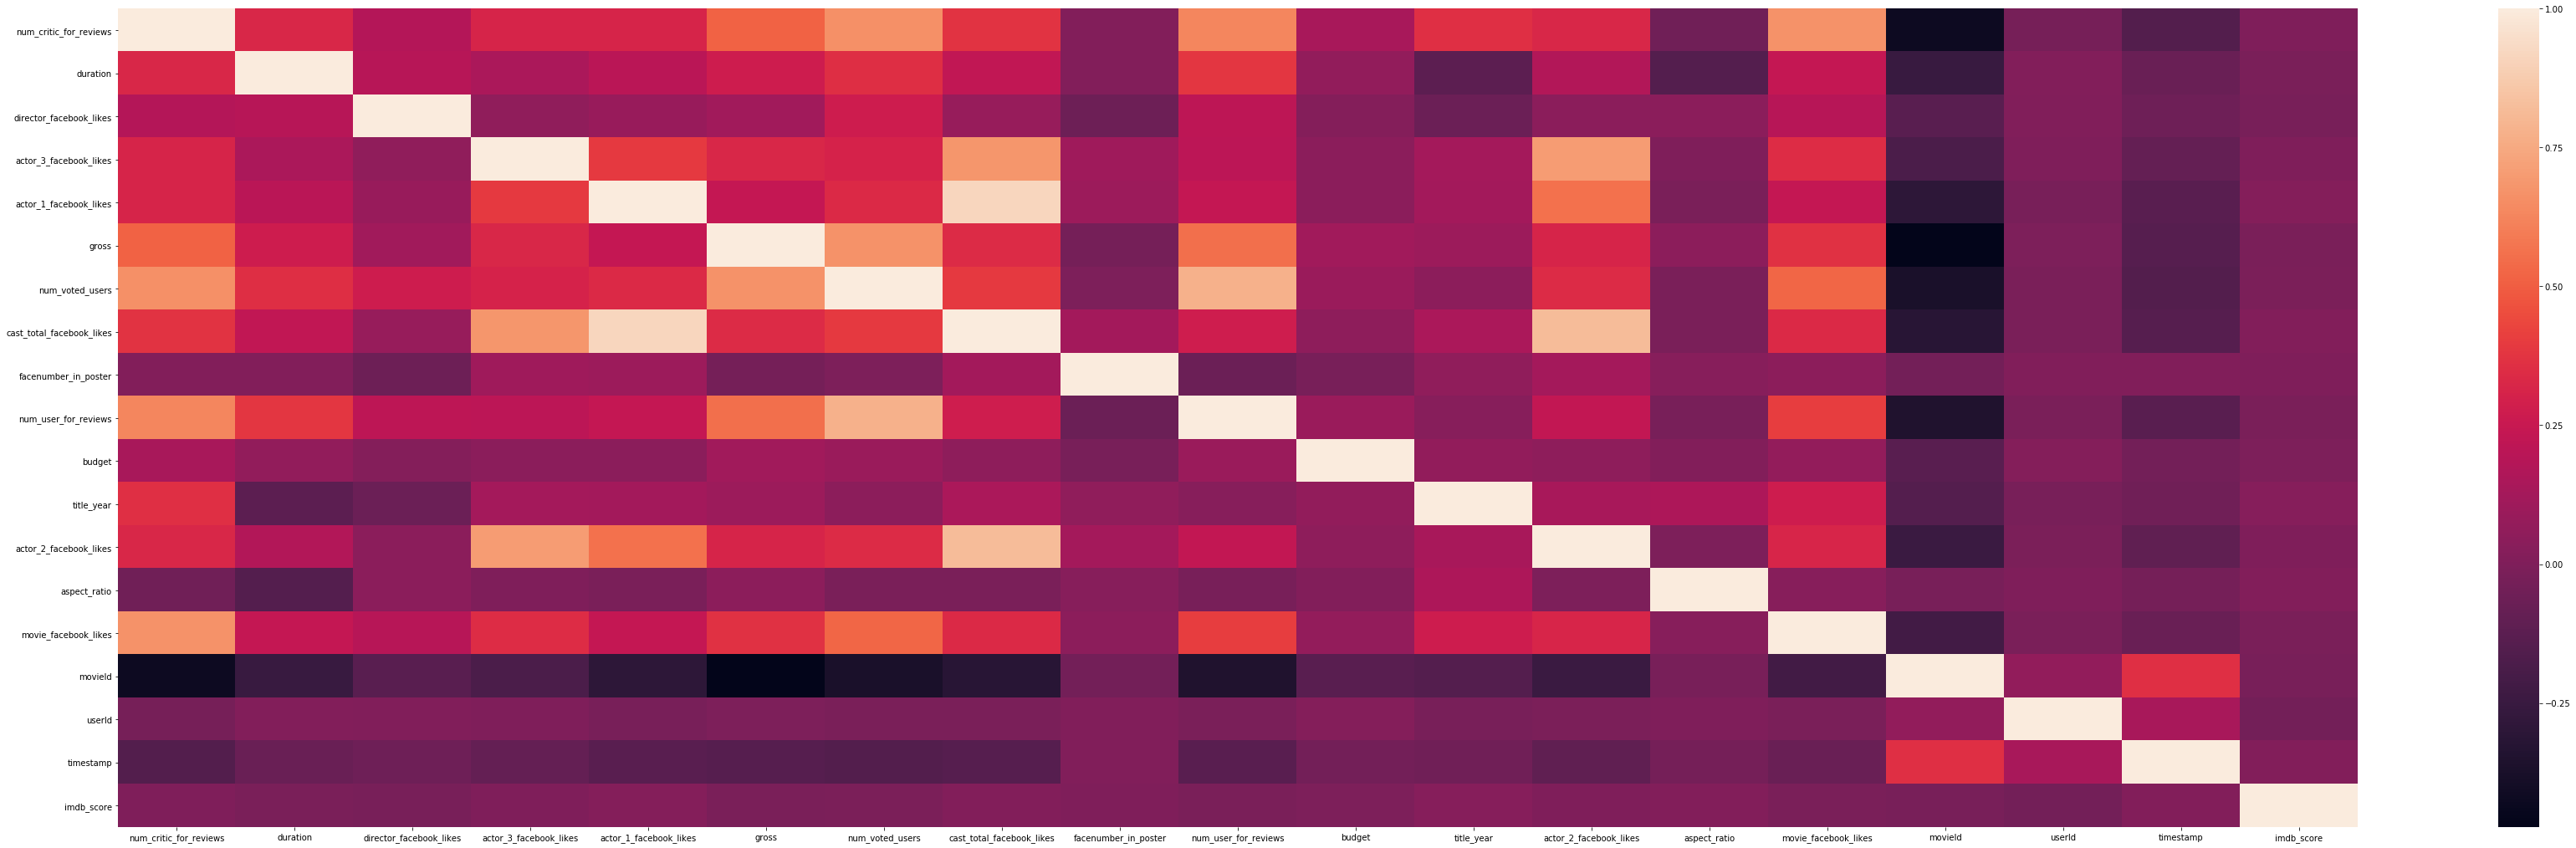

In [15]:
correlations = m.corr()
print (correlations)
sns.heatmap(correlations)
plt.rcParams['figure.figsize'] = (20,10)

In [16]:
#The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes"
#The "movie_facebook_likes" has strong correlation with "num_critic_for_reviews", meaning that the popularity of a movie in social network can be largely affected by the critics
#The "movie_facebook_likes" has relatively large correlation with the "num_voted_users"
#The movie "gross" has strong positive correlation with the "num_voted_users"
#The "imdb_score" has very small but positive correlation with the "director_facebook_likes", meaning a popular director does not necessarily mean his directed movie is great.
#The "imdb_score" has very small but positive correlation with the "actor_1_facebook_likes", meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.
#The "imdb_score" has small but positive correlation with "duration". Long movies tend to have high rating.
#The "imdb_score" has small but negative correlation with "facenumber_in_poster". It is perhaps not a good idea to have many faces in movie poster if a movie wants to be great.
#The "imdb_score" has almost no correlation with "budget". Throwing money at a movie will not necessarily make it great

In [17]:

m1=m.copy()


In [18]:
m1.dropna(inplace=True)
del m1['color']
del m1['director_name']
del m1['gross']
del m1['genres']
del m1['actor_1_name']
del m1['movie_title']
del m1['actor_3_name']
del m1['plot_keywords']
del m1['movie_imdb_link']
del m1['language']
del m1['country']
del m1['content_rating']
del m1['budget']
del m1['actor_2_name']

In [19]:
pca = PCA(n_components=3)
pca.fit(m1)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

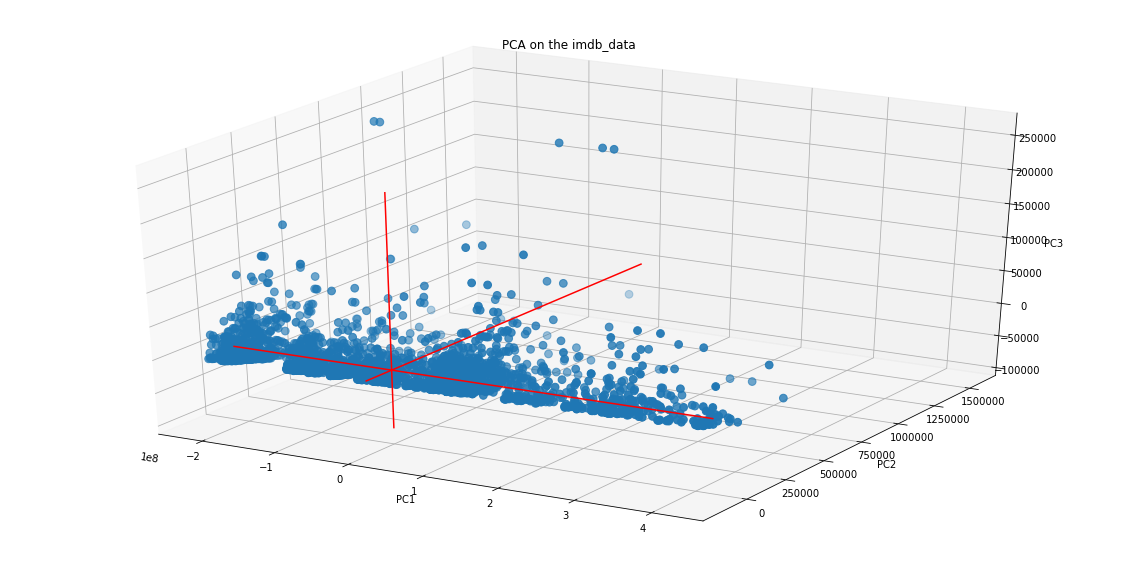

In [20]:
result=pd.DataFrame(pca.transform(m1), columns=['PCA%i' % i for i in range(3)], index=m1.index)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the imdb_data")
plt.show()



In [21]:
# Multiple Linear Regression

In [22]:
#Both the correlation matrix and the 3D PCA plot show that multicollinearity exists in the 15 continuous variables. 
#When fitting a multiple linear regression model to predict movie rating, we need to further remove some variables 
#to reduce multicollinearity. Therefore, I remove the following variables: "gross", "cast_total_facebook_likes", 
#"num_critic_for_reviews", "num_voted_users", and "movie_facebook_likes". 
#Some variables are not applicable for prediction, such as "num_voted_users" and "movie_facebook_likes",
#because these numbers will be unavailable before a movie is released

In [23]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [24]:
m.dropna(inplace=True)
X = m[['director_facebook_likes', 'duration', 'actor_1_facebook_likes',  
       'actor_2_facebook_likes','facenumber_in_poster','title_year']]
y = m['imdb_score']

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  
#This means the "imdb_dcore" increases, if the "facenumber_in_poster" is less than 6. 
#Similarly, the "imdb_score"increases, if there is a increase in "director_facebook_likes" by 4

Coefficient
director_facebook_likes    -0.000012
duration                   -0.000040
actor_1_facebook_likes      0.000003
actor_2_facebook_likes     -0.000004
facenumber_in_poster       -0.005669
title_year                  0.000513

In [28]:
# Making Predictions
y_pred = regressor.predict(X_test)  

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

Actual  Predicted
1356     6.2   6.463811
674      7.5   6.501274
658      6.5   6.448147
2933     7.8   6.438279
1767     6.8   6.453581
1587     4.9   6.489089
2772     6.3   6.449715
771      4.4   6.461111
2038     4.7   6.478399
358      6.2   6.465272
1330     6.8   6.485823
479      4.4   6.428003
1219     8.1   6.511306
2619     5.7   6.500931
1440     5.1   6.448816
1429     8.2   6.457916
2435     5.5   6.467710
443      7.1   6.310505
1166     5.3   6.457084
1636     6.4   6.297326
3271     6.0   6.482646
2952     6.9   6.458681
2713     6.1   6.462069
1300     5.1   6.485081
1318     7.0   6.461372
2578     6.6   6.449515
1516     6.6   6.506180
35       6.1   6.536455
3727     7.0   6.446846
799      6.8   6.476156
...      ...        ...
2354     7.1   6.467380
3063     6.5   6.468843
1032     7.0   6.492750
2346     7.7   6.504801
3662     8.3   6.459033
2475     5.9   6.472494
2071     6.2   6.464459
3022     7.4   6.469092
2337     5.9   6.442620
1734     5.7   6.464803
3037     6.9   6.464447
1384     6.4   6.446188
2697     7.5   6.448338
2447     7.5   6.458964
1626     6.0   6.489382
554      7.7   6.466441
1360     5.3   6.463811
233      7.3   6.465644
39       6.1   6.496350
3290     5.5   6.460484
1408     7.5   6.459470
2592     6.5   6.452588
603      5.7   6.494210
2041     4.1   6.465330
240      6.2   6.445565
2572     5.6   6.459726
2069     6.5   6.482502
837      5.5   6.507025
3447     7.9   6.427798
965      6.9   6.487362

[678 rows x 2 columns]

In [30]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.877694976594
Mean Squared Error: 1.27260579298
Root Mean Squared Error: 1.12809830821


In [31]:
regressor.score(X,y)

0.0013116177146391683

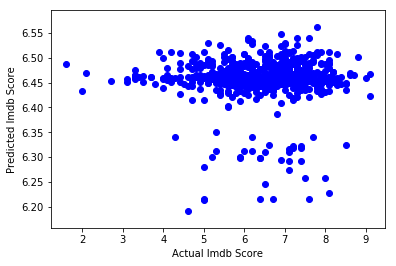

In [32]:
plt.scatter(y_test, y_pred , color='blue')
plt.xlabel("Actual Imdb Score")
plt.ylabel("Predicted Imdb Score")
plt.show()


In [33]:
#m.dropna(inplace=True)
#X1 = m[['director_facebook_likes', 'duration', 'actor_1_facebook_likes',  
 #      'actor_2_facebook_likes','facenumber_in_poster','title_year']]
#m.imdb_score = m.imdb_score*10
#y1 = m['imdb_score']

In [34]:
#trainArr = m.as_matrix(X1)    # training array
#trainRes = m.as_matrix(y)

In [35]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=10)    # 100 decision trees is a good enough number
#rf.fit(X1,y) 
colsRes = ['imdb_score']
X = m1.drop(colsRes, axis = 1)
y = np.asarray(m1['imdb_score'], dtype="|S6")


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [38]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.041273584905660375